## Ejemplo Kmeans (Agrupamiento no jerárquico)

In [49]:
# importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix

In [2]:
# Cargar el conjunto de datos Iris
iris = load_iris()

# Mostrar la tabla con los datos 
iris_data_pd = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data_pd['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # correlación numérica a categórica
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Nº de cluster (codo)
Sirve para ver cuantos grupos haces cuando no se conoce el dataset.
Cuando es el "codo" es cuando es bueno.

c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

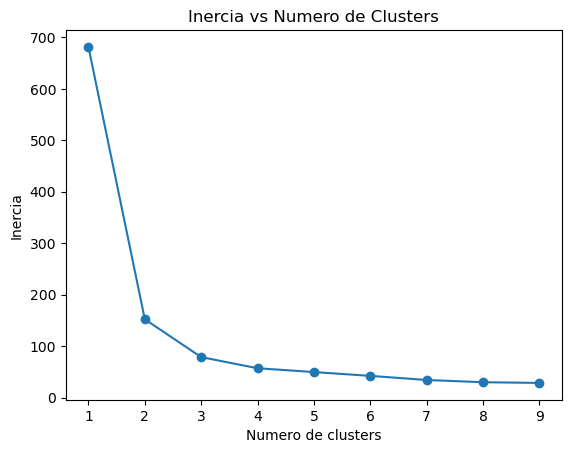

In [3]:
# Bucle para ver con clusters de 1 a 10 y ver la inercia
inertia = [] # desviaciónes frente a los centroides
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(iris.data) # Usar las características de longitud y anchura del pétalo (2D)
    inertia.append(kmeans.inertia_)
    
# Visualizamos en un gráfico de las inercias
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.title('Inercia vs Numero de Clusters')
plt.show()

In [30]:
# Kmeans con 3 clusters (3 especies de flores)
kmeans = KMeans(n_clusters=3, n_init=10) # n_init=10, se ejecuta 10 veces con diferentes centroides iniciales, el mejor se queda
kmeans.fit(iris.data[:, 2:4]) # entenamiento
labels = kmeans.labels_ # etiquetas de los clusters
centroids = kmeans.cluster_centers_ # centroides

print(labels)
print(centroids) # estan las 4 características


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
# Añadimos la etiqueta de los clusters al DataFrame
iris_data_pd['Cluster'] = labels
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


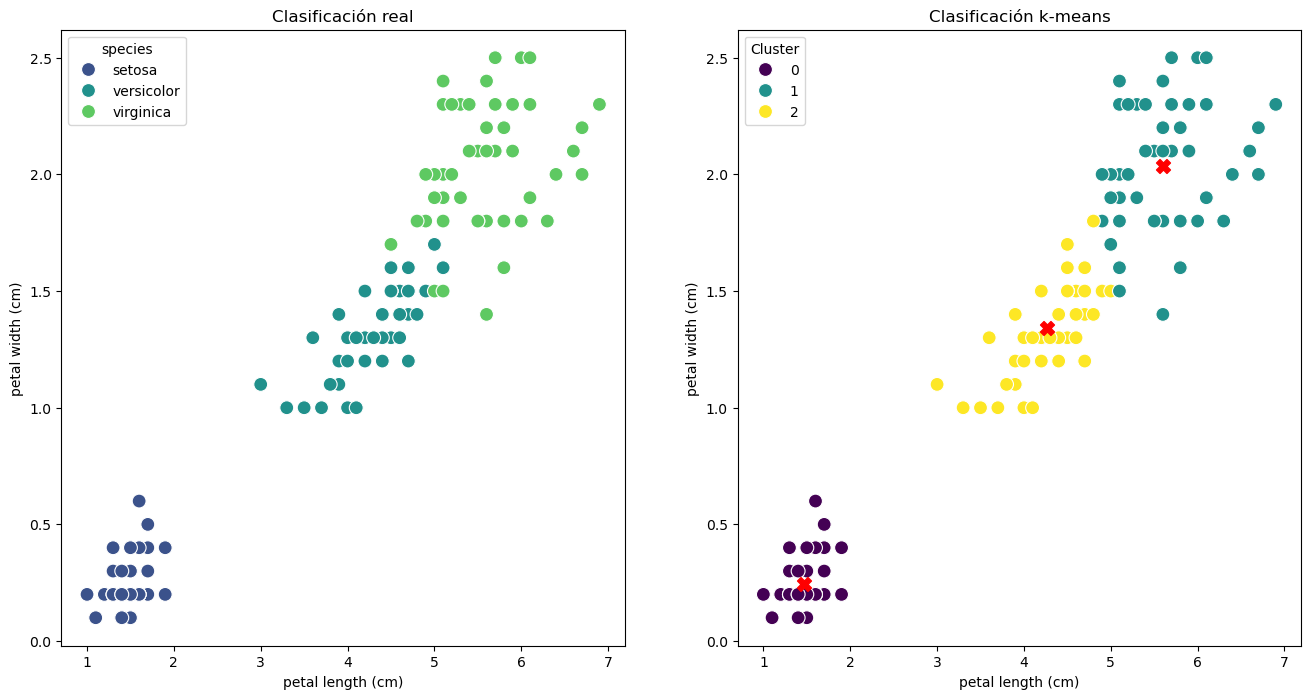

In [ ]:
# visulaizar gráficos real vs kmeans
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Visualizar gráfico de dispersión con las etiquetas reales con seaborn
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=100)
axes[0].set_title('Clasificación real')

# Visualizar gráfico de dispersión con las etiquetas k-means con seaborn
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='Cluster', ax=axes[1], palette='viridis', s=100)
axes[1].set_title('Clasificación k-means')
axes[1].scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label="Centroides")

plt.show()

### Matriz de confusión

In [60]:
# Matríz de confusión
contingency_matrix = pd.crosstab(iris.target, labels, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                 50   0   0
1                  0   2  48
2                  0  46   4


In [55]:
# Compara qué tan similares son dos agrupaciones. 1.0 es una coincidencia perfecta.
ari = adjusted_rand_score(iris.target, labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.8857


In [59]:
# Mapeando los clusters generados por kmeans para que coincidan con las observaciones
y_pred_mapped = np.copy(labels)
y_pred_mapped[labels==1] = 0
y_pred_mapped[labels==0] = 1
y_pred_mapped[labels==2] = 2 # El 2 ya coincide